# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "emotion" in their title or abstract. You can download that dataset in the form of four files (`emotion_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file.

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/emotion_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[34630934]

paper(title='Effect of Prolonged Exposure, intensified Prolonged Exposure and STAIR+Prolonged Exposure in patients with PTSD related to childhood abuse: a randomized controlled trial.', authors=['Oprel DAC', 'Hoeboer CM', 'Schoorl M', 'de Kleine RA', 'Cloitre M', 'Wigard IG', 'van Minnen A', 'van der Does W'], year=2021, doi='10.1080/20008198.2020.1851511')

In [5]:
Summaries[34630934].title

'Effect of Prolonged Exposure, intensified Prolonged Exposure and STAIR+Prolonged Exposure in patients with PTSD related to childhood abuse: a randomized controlled trial.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy

In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2013, 2395), (2014, 2713), (2015, 2951), (2016, 3050), (2017, 3249), (2018, 3493), (2019, 3750), (2020, 4364), (2021, 4719), (2022, 8)]


Filtering results, to obain only papers since 1940:

In [9]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
46466


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

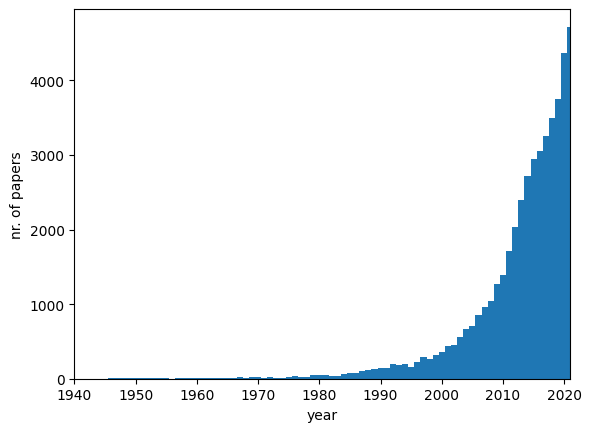

In [10]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2021)
plt.xlabel('year')
plt.ylabel('nr. of papers');

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

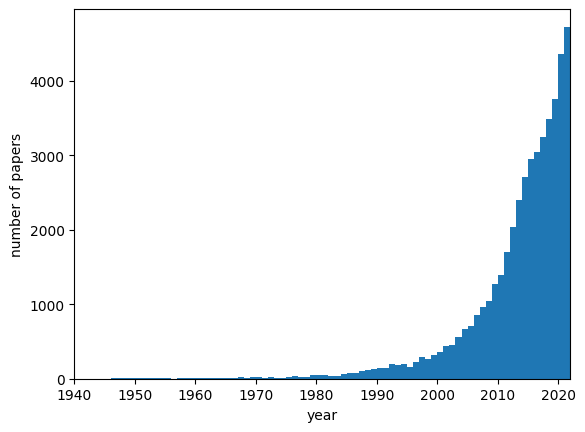

In [11]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2023) );
plt.xlim(1940, 2022)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [12]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( flat_author_list )

In [13]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
99675


In [14]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Wang Y', 240), ('Gross JJ', 221), ('Zhang J', 173), ('Li Y', 159), ('Zhang Y', 156), ('Wang X', 151), ('Li X', 141), ('Liu Y', 133), ('Wang J', 133), ('Wang L', 127), ('Li J', 123), ('Gur RC', 122), ('Davidson RJ', 120), ('Zhang X', 119), ('Liu X', 118), ('Phillips ML', 112), ('Chen Y', 111), ('Li H', 105), ('Pine DS', 99), ('Yang J', 98), ('de Gelder B', 98), ('Barrett LF', 98), ('Gratz KL', 97), ('Phan KL', 95), ('Habel U', 91), ('Yang Y', 90), ('Liu J', 87), ('Wang H', 85), ('Zhang L', 85), ('Tull MT', 85), ('Zhang W', 83), ('Chen J', 83), ('Vuilleumier P', 82), ('Gur RE', 80), ('Adolphs R', 79), ('Wang Z', 78), ('Li S', 78), ('Aleman A', 76), ('Kensinger EA', 76), ('Scherer KR', 75), ('Chen X', 75), ('Kuppens P', 75), ('Zvolensky MJ', 73), ('Li L', 72), ('Levenson RW', 72), ('Leibenluft E', 72), ('Tranel D', 71), ('Williams LM', 71), ('Li W', 69), ('Schneider F', 69)]


Then we can create a histogram to visualize the results:

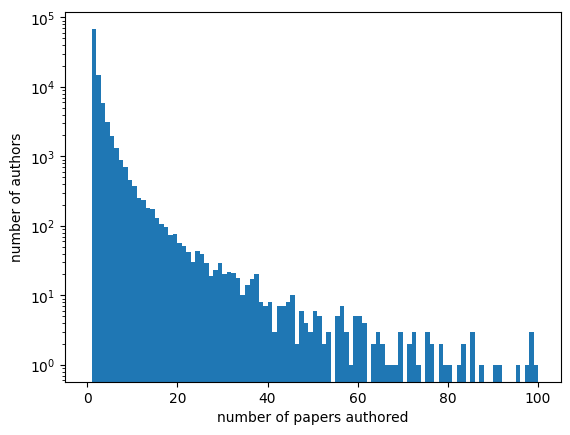

In [15]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(101), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

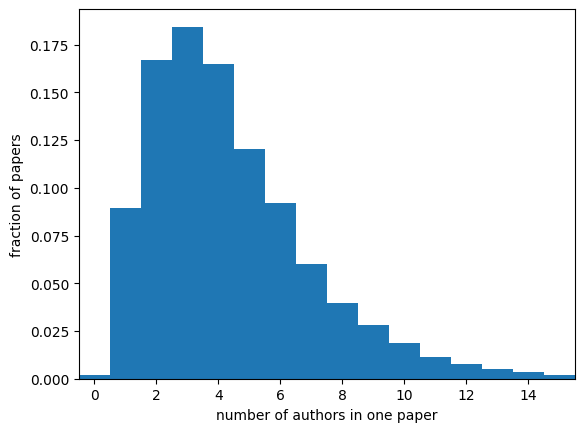

In [16]:
plt.hist(x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True)
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [17]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
40245


----------

# Tasks

**Your name:** Payton Ketterman

### Task 1

Create a Python dictionary object that returns a set of all names of first authors (that is, the authors that appear first in the list of authors) for a given year. Name this dictionary `first_authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the set of first authors for the year 1965.

In [23]:
# As mentioned in description, we initialize defaultdict with value set for first_authors_at_year 
first_authors_at_year = defaultdict(set)

# Then we add the first authors of papers to dictionary with this loop
for paper in Summaries.values():
    # Add the author to corresponding year, but first check that there is at least one author
    if paper.authors:
        first_authors_at_year[paper.year].add(paper.authors[0])

# Display the set of first authors
print("The first authors appearing in papers for the year 1965 are:")
print(first_authors_at_year[1965])


The first authors appearing in papers for the year 1965 are:
{'Doherty TT', 'Plutchik R', 'Coppock JB', 'Greenfield AD', 'JANICEK M'}


### Task 2

Based on the dictionary `first_authors_at_year` from exercise 1 above, create a plot for the years from 1965 until 2021 that shows how many authors published at least one paper as first author in the given particular year.

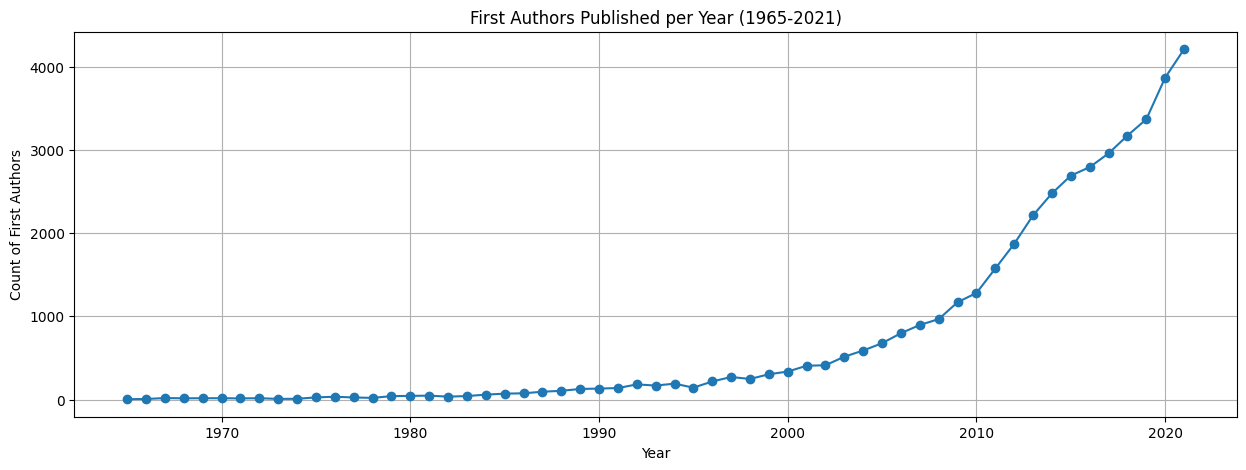

In [19]:
# We first pull the number of _unique_ first authors for each year from 1965 to 2021 using list comprehension
years = list(range(1965, 2022))
unique_first_authors = [len(first_authors_at_year[year]) if year in first_authors_at_year else 0 for year in years]

# Plot the graph of authors publishing papers by year
plt.figure(figsize=(15, 5))
plt.plot(years, unique_first_authors, marker='o')

# Adding title and labels
plt.title('First Authors Published per Year (1965-2021)')
plt.xlabel('Year')
plt.ylabel('Count of First Authors')
plt.grid(True)

# Show the plot
plt.show()

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency, in descending order with respect to the frequency. Filter out words that are only one, two or three characters long, like `a` or `of` or `the`, to only show words that have four or more characters. Use the data structures created above (in the sections before the tasks).

In [20]:
# Filter out words that are only one, two, or three characters long
filtered_word_counts = {word: count for word, count in word_counts.items() if len(word) >= 4}

# Sort the words by frequency in descending order and get the top 10
top_words = sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True)[:10]

# Print out the top 10 most often occurring words and their frequency
top_words 

[('emotion', 10834),
 ('with', 8407),
 ('emotional', 6656),
 ('social', 2896),
 ('regulation', 2834),
 ('facial', 2761),
 ('between', 2417),
 ('effects', 2326),
 ('from', 2266),
 ('study.', 2186)]

### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent, again only counting words of four or more characters. (For readability, don't show the actual words.) Make again use of the data structures created above.

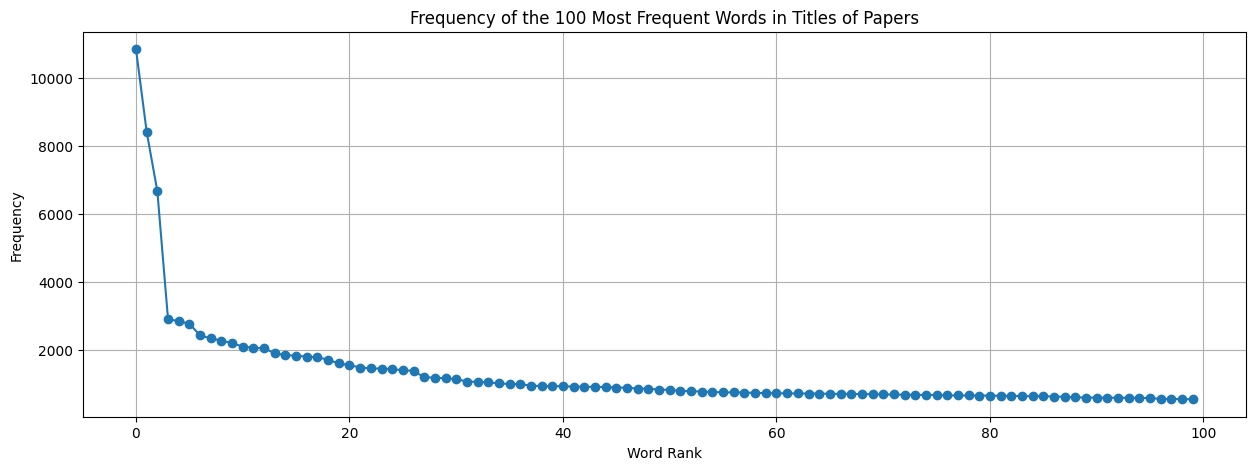

In [21]:
# Filter out words that are less than four characters long
filtered_word_counts = {word: count for word, count in word_counts.items() if len(word) >= 4}

# Get the frequencies of the 100 most frequent words
frequencies_of_top_100 = sorted(filtered_word_counts.values(), reverse=True)[:100]

# Plot the frequencies
plt.figure(figsize=(15, 5))
plt.plot(frequencies_of_top_100, marker='o')

# Add title and labels (without showing the actual words for readability)
plt.title('Frequency of the 100 Most Frequent Words in Titles of Papers')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain all types of words we find in this top-10 and why they show up here.

**your answer:** 

...

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done **individually**, and that code sharing or copying are **strictly forbidden** and will be punished.